<a href="https://colab.research.google.com/github/Requenamar3/Data-Mining/blob/main/KMeans_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/taxstats2015.csv")

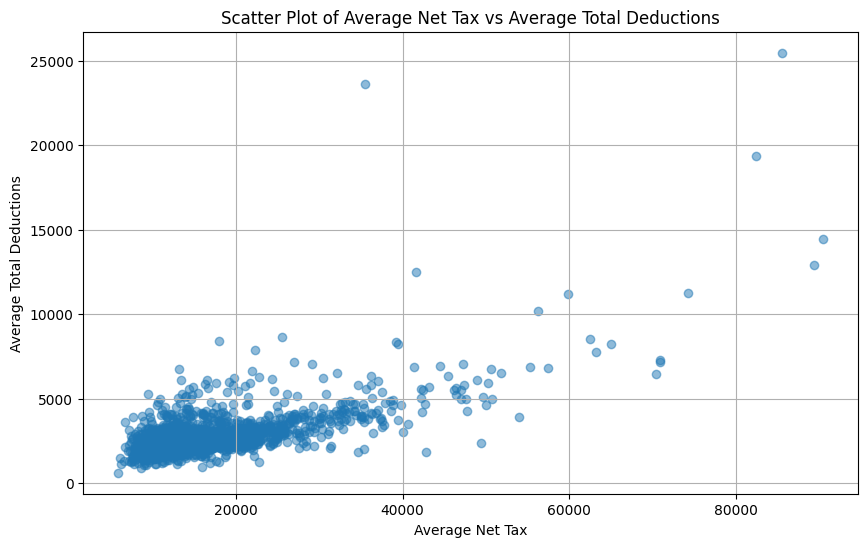

In [ ]:
# Creating a scatter plot for 'Average Net Tax' vs 'Average Total Deductions'

plt.figure(figsize=(10, 6))
plt.scatter(df['Average net tax'], df['Average total deductions'], alpha=0.5)
plt.title('Scatter Plot of Average Net Tax vs Average Total Deductions')
plt.xlabel('Average Net Tax')
plt.ylabel('Average Total Deductions')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
file_url = "https://raw.githubusercontent.com/fenago/datasets/main/taxstats2015.csv"

In [ ]:
df = pd.read_csv(file_url, usecols=['Postcode', 'Average net tax', 'Average total deductions'])

In [ ]:
df.head()

,Postcode,Average total deductions,Average net tax
0,2000,2071,27555
1,2006,3804,28142
2,2007,1740,15649
3,2008,3917,53976
4,2009,3433,32430


In [ ]:
kmeans = KMeans(random_state=42)

In [ ]:
X = df[['Average net tax', 'Average total deductions']]

In [ ]:
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=42)

In [ ]:
y_preds = kmeans.predict(X)
y_preds

array([1, 1, 4, ..., 4, 1, 4], dtype=int32)

In [ ]:
df['cluster'] = y_preds
df.head()

,Postcode,Average total deductions,Average net tax,cluster
0,2000,2071,27555,1
1,2006,3804,28142,1
2,2007,1740,15649,4
3,2008,3917,53976,6
4,2009,3433,32430,3


In [ ]:
import numpy as np
df.pivot_table(values=['Average net tax', 'Average total deductions'], index='cluster', aggfunc=np.mean)

,Average net tax,Average total deductions
cluster,,
0,10061.908408,2170.424925
1,26765.963235,3498.676471
2,79316.875000,13057.750000
3,36197.407895,4789.328947
4,16233.387500,2644.829167
5,20360.962264,2910.710692
6,51412.703704,6234.333333
7,12904.741470,2468.526247


In [ ]:
import altair as alt
chart = alt.Chart(df)
scatter_plot = chart.mark_circle()
scatter_plot.encode(x='Average net tax', y='Average total deductions', color='cluster:N')

alt.Chart(...)

In [ ]:
scatter_plot.encode(x='Average net tax', y='Average total deductions', color='cluster:N', tooltip=['Postcode', 'cluster', 'Average net tax', 'Average total deductions']).interactive()

alt.Chart(...)

In [ ]:
?kmeans

# Cluster by Business Income and Expense

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import altair as alt
import numpy as np
file_url = "https://raw.githubusercontent.com/fenago/datasets/main/taxstats2015.csv"
df = pd.read_csv(file_url, usecols=['Postcode', 'Average total business income', 'Average total business expenses'])

In [ ]:
df.head()

,Postcode,Average total business income,Average total business expenses
0,2000,210901,222191
1,2006,69983,48971
2,2007,575099,639499
3,2008,53329,32173
4,2009,237539,222993


In [ ]:
X = df[['Average total business income', 'Average total business expenses']]

In [ ]:
kmeans = KMeans(random_state=8)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=8)

In [ ]:
y_preds = kmeans.predict(X)
y_preds[-10:]

array([2, 0, 0, 5, 7, 0, 0, 0, 0, 2], dtype=int32)

In [ ]:
df['cluster'] = y_preds
df.tail(10)

,Postcode,Average total business income,Average total business expenses,cluster
2463,852,95299,79526,2
2464,853,21186,15336,0
2465,854,49303,29720,0
2466,860,63190,55802,5
2467,862,134224,144254,7
2468,870,62793,44687,0
2469,872,53025,45670,0
2470,880,45603,28700,0
2471,885,53148,39850,0
2472,886,121057,90120,2


In [ ]:
df.pivot_table(values=['Average total business income', 'Average total business expenses'], index='cluster', aggfunc=np.mean)

,Average total business expenses,Average total business income
cluster,,
0,38130.124827,53608.097087
1,250410.190476,301417.809524
2,82319.305970,104102.712687
3,173350.259740,208767.740260
4,812481.333333,837920.333333
5,58310.891111,76449.391111
6,449722.500000,488551.625000
7,118572.299517,145933.570048


In [ ]:
scatter_plot = alt.Chart(df).mark_circle()
scatter_plot.encode(x='Average total business income', y='Average total business expenses', color='cluster:N', tooltip = ['Postcode', 'cluster', 'Average total business income', 'Average total business expenses']).interactive()

alt.Chart(...)

# How do you know the RIGHT number of clusters?

In [ ]:
clusters = pd.DataFrame()
clusters['cluster_range'] = range(1, 10)
inertia = []

In [ ]:
for k in clusters['cluster_range']:
  kmeans = KMeans(n_clusters=k, random_state=8).fit(X)
  inertia.append(kmeans.inertia_)

In [ ]:
clusters['inertia'] = inertia
clusters

,cluster_range,inertia
0,1,1.333516e+13
1,2,7.063097e+12
2,3,3.718740e+12
3,4,2.341856e+12
4,5,1.713751e+12
5,6,1.229803e+12
6,7,9.420083e+11
7,8,7.488847e+11
8,9,6.346222e+11


In [ ]:
alt.Chart(clusters).mark_line().encode(x='cluster_range', y='inertia')

alt.Chart(...)

# Find the optimal number of clusters between Business Income & Expenses

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import altair as alt

In [ ]:
file_url = "https://raw.githubusercontent.com/fenago/datasets/main/taxstats2015.csv"
df = pd.read_csv(file_url, usecols=['Postcode', 'Average total business income', 'Average total business expenses'])
df.head()

,Postcode,Average total business income,Average total business expenses
0,2000,210901,222191
1,2006,69983,48971
2,2007,575099,639499
3,2008,53329,32173
4,2009,237539,222993


In [ ]:
X = df[['Average total business income', 'Average total business expenses']]

In [ ]:
# Identify the best number of clusters for this particular data
clusters = pd.DataFrame()
inertia = []
clusters['cluster_range'] = range(1, 15)
for k in clusters['cluster_range']:
  kmeans = KMeans(n_clusters=k).fit(X)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
clusters['inertia'] = inertia
clusters

,cluster_range,inertia
0,1,1.333516e+13
1,2,7.063097e+12
2,3,3.718740e+12
3,4,2.341856e+12
4,5,1.714273e+12
5,6,1.224205e+12
6,7,9.464283e+11
7,8,7.488533e+11
8,9,6.346188e+11
9,10,5.633064e+11


In [ ]:
alt.Chart(clusters).mark_line().encode(alt.X('cluster_range'), alt.Y('inertia'))

alt.Chart(...)

In [ ]:
optim_cluster = 4

In [ ]:
kmeans = KMeans(random_state=42, n_clusters=optim_cluster)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
df['cluster2'] = kmeans.predict(X)

In [ ]:
df.head()

,Postcode,Average total business income,Average total business expenses,cluster2
0,2000,210901,222191,1
1,2006,69983,48971,0
2,2007,575099,639499,2
3,2008,53329,32173,0
4,2009,237539,222993,1


In [ ]:
alt.Chart(df).mark_circle().encode(x='Average total business income', y='Average total business expenses', color='cluster2:N', tooltip=['Postcode', 'cluster2', 'Average total business income','Average total business expenses']).interactive()

alt.Chart(...)

# Let's do a practical use case with data.csv from

## https://www.kaggle.com/code/fabiendaniel/customer-segmentation/input

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/ecom_data.csv', encoding='ISO-8859-1')

# Convert InvoiceDate from string to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate total spend for each transaction
data['TotalSpend'] = data['Quantity'] * data['UnitPrice']


In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Aggregate data by CustomerID
customer_data = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (x.max() - x.min()).days,
    'InvoiceNo': 'count',
    'TotalSpend': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency'})


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

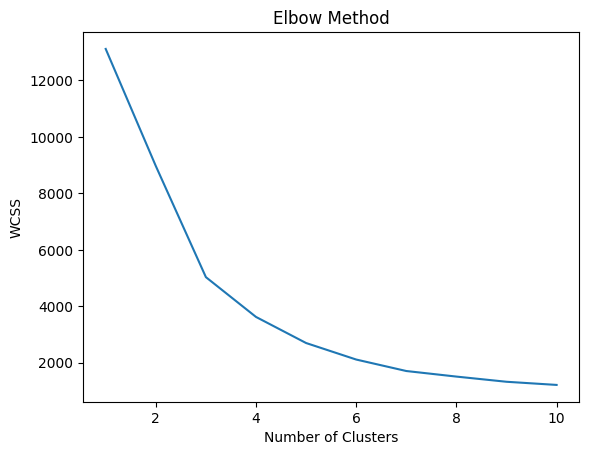

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['Recency', 'Frequency', 'TotalSpend']])

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the WCSS for each number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Assuming optimal_clusters is determined from the Elbow plot
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
customer_data.head()

,Recency,Frequency,TotalSpend,Cluster
CustomerID,,,,
12346.0,0,2,0.00,0
12347.0,365,182,4310.00,1
12348.0,282,31,1797.24,1
12349.0,0,73,1757.55,0
12350.0,0,17,334.40,0


In [ ]:
# Analyzing cluster characteristics
cluster_analysis = customer_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'TotalSpend': 'mean'
})


In [ ]:
cluster_analysis

,Recency,Frequency,TotalSpend
Cluster,,,
0,32.419681,37.385842,591.700697
1,277.258371,157.358817,3102.219666
2,350.600000,1013.400000,192103.854000
3,303.000000,5914.000000,64776.602500
